In [ ]:
import numpy as np
import matplotlib.pyplot as plt

First of all: we are going to introduce a dataset on that we apply our clustering method on:

In [ ]:
def twospirals(n_points, noise=.5):
    """
     Returns the two spirals dataset.
    """
    epsilon = 0.1
    n = (np.random.rand(n_points,1)+epsilon) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise

    # hstack/vstack stacks data on top of each other (print shape to see what I mean)
    C_1 = np.hstack((d1x,d1y))
    C_2 = np.hstack((-d1x,-d1y))
    return np.vstack((C_1, C_2))

This is a dataset consisting of clusters twisting around each other. You don't need to understand the mathematics behind it, but you can play around with it if you like (make sure to train on the original dataset, not one you created)



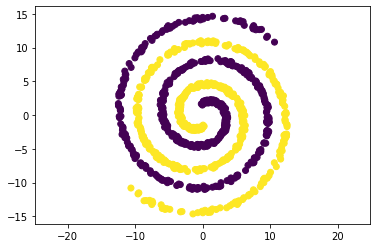

In [ ]:
np.random.seed(10)
data_size = 500

dataset = twospirals(data_size)
labels = np.hstack((np.zeros(data_size),np.ones(data_size)))

# scatter makes a 2D scatter plot. Unfortunately you have to seperate the x-dim from the y-dim
# the labels are helpful for coloring. The algorithm does not use them, since this is unsupervised
plt.scatter(dataset[:,0], dataset[:,1], c = labels)
plt.axis('equal')
plt.show()

a) Implement the DBSCAN algorithm to classify points of the two clusters.

b) Plot a scatter plot highlighting the clusters that were found after finding good hyperparameter values eps and minPts.

c) Print accuracies for different data_size values.

d) For what kind of data_size values does the algorithm fail and why? What would you say are disadvantages of DBSCAN?

In [ ]:
def euclidean_distance(x_1, x_2):
      return np.sqrt(np.sum((x_1-x_2)**2, axis = 1))


def rangeQuery(x, eps = 0.5):
  distances = euclidean_distance(x, dataset)
  neighbor_booleans = distances <= eps
  N = dataset[neighbor_booleans]
  Positions = np.arange(2*data_size)[neighbor_booleans]
  return set(Positions)



(1000,)
2


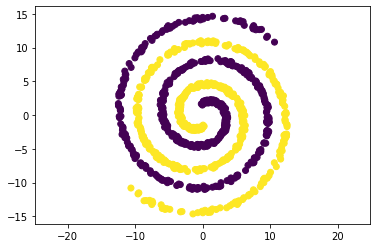

In [ ]:
minPts = 2
eps = 1.7

labels = {}

C = 0
for i, x in enumerate(dataset):
  if i in labels:
    continue
  N_Positions = rangeQuery(x, eps)
  if len(N_Positions) < minPts:
    labels[i] = 0                                      # 0 is the noise label
    continue
  C = C + 1
  labels[i] = C
  S_Positions = N_Positions.difference({i})
  S_list = list(S_Positions)
  for j in S_list:
    if j in labels and labels[j] == 0:
      labels[j] = labels[i]
    if j in labels:
      continue
    labels[j] = labels[i]
    N_Positions = rangeQuery(dataset[j], eps)
    if len(N_Positions) >= minPts:
      S_append = S_Positions.union(N_Positions).difference(S_Positions)
      S_list.extend(list(S_append))


clusters = np.zeros(2*data_size)
print(np.array(list(labels.keys())).astype(int).shape)
clusters[np.array(list(labels.keys())).astype(int)] = np.array(list(labels.values()))


print(C)

plt.scatter(dataset[:,0], dataset[:,1], c = clusters)
plt.axis('equal')
plt.show()